# Decision Tree Model on Weather Dataset
## Anisha Rajesh (6851162)
##### Code referenced from Lab 1 and Lab 2 of MLDM 

## 1) Decision Tree Initial Hold-out Results (75/25 split):

### Import Statements

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Seperating Features

In [2]:
# Load the dataset that has been pre-processed
balanced_dataset = pd.read_csv('weather_final.csv')

X = balanced_dataset.drop('RainTomorrow', axis=1)
y = balanced_dataset['RainTomorrow']
print(X)
print(y)

        RainToday  Humidity3pm  Sunshine  Cloud3pm  Cloud9am  Humidity9am  \
0               0    22.000000  8.400000  7.000000  8.000000    71.000000   
1               0    25.000000  8.400000  7.000000  8.000000    44.000000   
2               0    30.000000  8.400000  2.000000  8.000000    38.000000   
3               0    16.000000  8.400000  7.000000  8.000000    45.000000   
4               0    33.000000  8.400000  8.000000  7.000000    82.000000   
...           ...          ...       ...       ...       ...          ...   
218615          1    90.514187  8.600000  8.000000  8.000000    86.914879   
218616          1    87.464475  8.400000  5.000000  6.000000    92.830594   
218617          0    68.806903  8.400000  5.806903  6.537936   100.000000   
218618          0    58.000000  8.400000  5.000000  3.121131    57.000000   
218619          1    69.389257  1.813254  7.000000  8.000000    91.097314   

         Rainfall  WindGustSpeed    Temp3pm  WindGustDir  WindDir9am  \
0  

### Splitting Dataset into 75%, 25 % training and testing 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

### Initialise and training Dataset 

In [4]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [5]:
y_pred = dt_model.predict(X_test)

#### Evaluating the Decision Tree on Train data

Accuracy Score on Train data:   0.9998231329856981

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82158
           1       1.00      1.00      1.00     81807

    accuracy                           1.00    163965
   macro avg       1.00      1.00      1.00    163965
weighted avg       1.00      1.00      1.00    163965



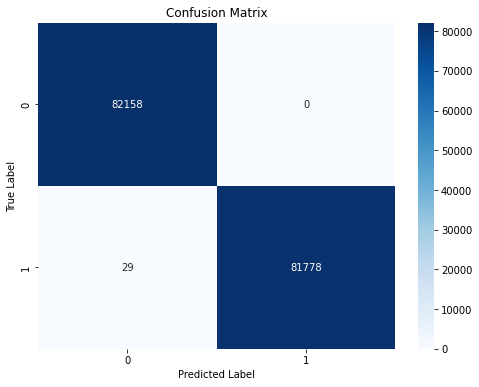

In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on Train data:  ', accuracy_score(y_true=y_train, y_pred=dt_model.predict(X_train)))

print("\nClassification Report:")
print(classification_report(y_train,y_pred=dt_model.predict(X_train)))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, y_pred=dt_model.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### Evaluating the Decision Tree on Test data

Accuracy Score on test data:   0.8390083249473973

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     27152
           1       0.83      0.85      0.84     27503

    accuracy                           0.84     54655
   macro avg       0.84      0.84      0.84     54655
weighted avg       0.84      0.84      0.84     54655



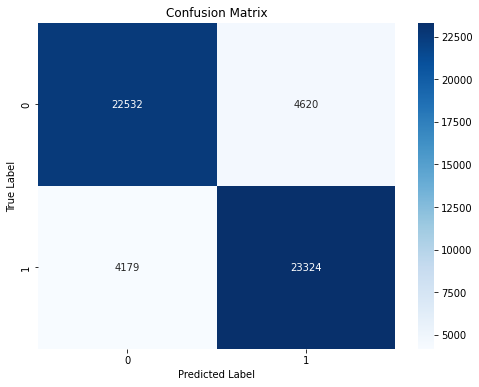

In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### Visualising a decision Tree

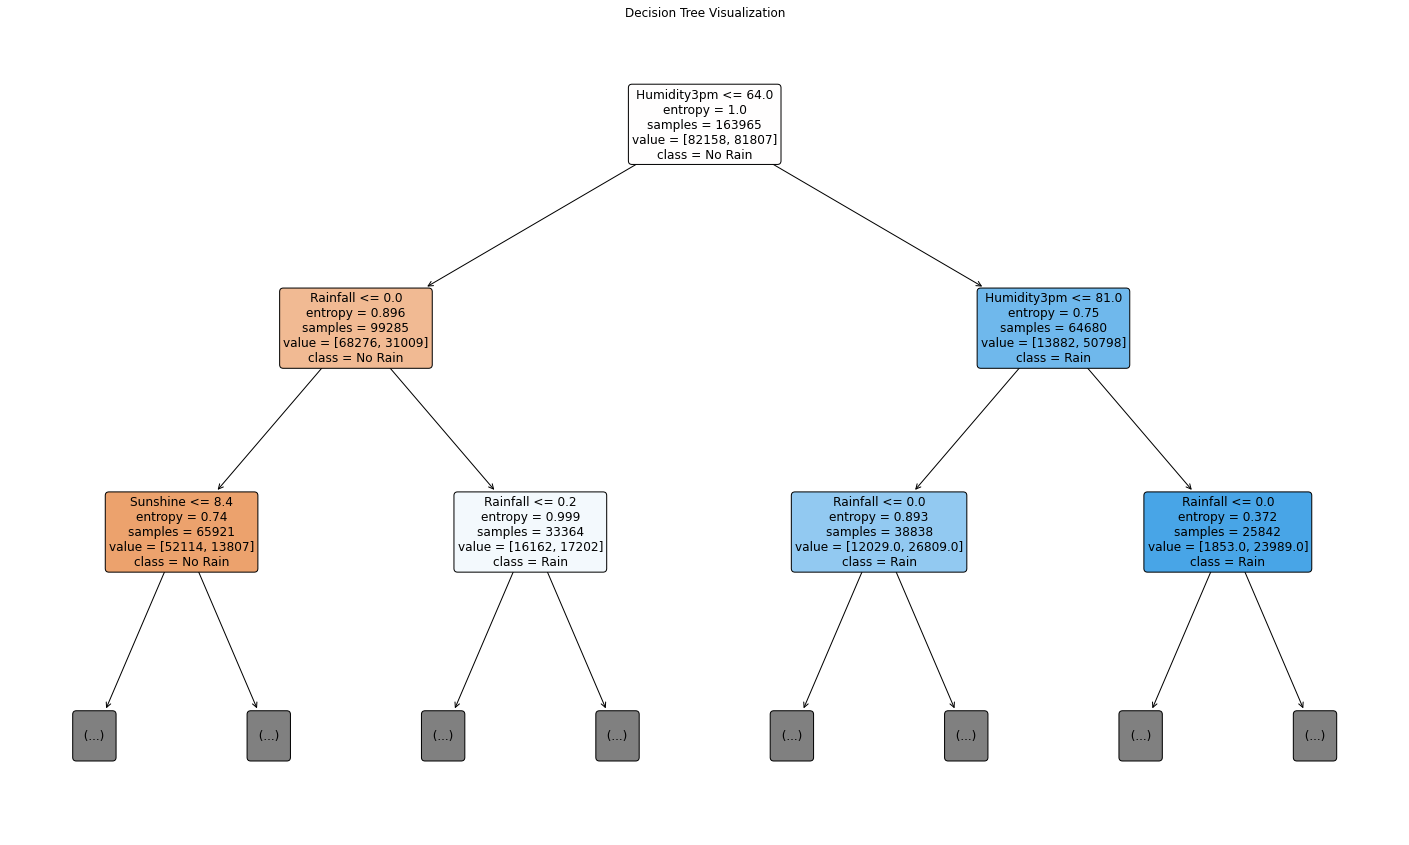

In [8]:
plt.figure(figsize=(25,15))

# Plot the decision tree
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Rain', 'Rain'],
          filled=True,  
          rounded=True,
          max_depth=2)  
plt.title('Decision Tree Visualization')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_model.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dt_model.predict(X_test)))

Accuracy Score on train data:  0.9998231329856981
Accuracy Score on the test data:  0.8390083249473973


### Pruning decision trees with cost complexity pruning 

<p> Looking at the example, we can see that the decision tree performs much better on the training data than the test data, which is a classic sign of overfitting.

I tested different ccp_alpha values to prune my decision tree. By increasing ccp_alpha, I removed extra branches and got a simpler model that performed better.

#### When: ccp_alpha=0.005

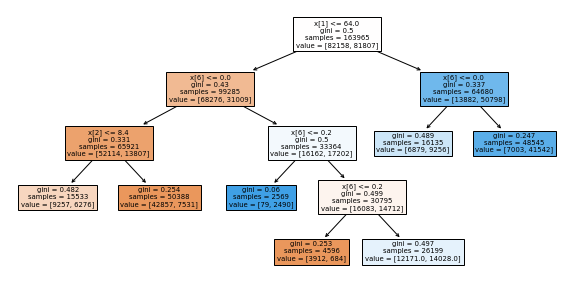

In [10]:
plt.figure(figsize=(10,5))
dt_model2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005).fit(X_train, y_train)
plot_tree(dt_model2, filled=True)
plt.show()

In [11]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_model2.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dt_model2.predict(X_test)))

Accuracy Score on train data:  0.7522459061385052
Accuracy Score on the test data:  0.750160095142256


#### When: ccp_alpha=0.01

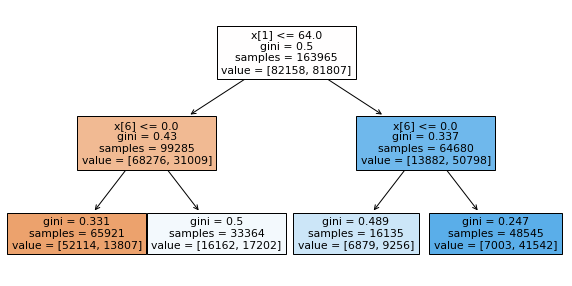

Accuracy Score on train data:  0.7325587777879425
Accuracy Score on the test data:  0.7311133473607172


In [12]:
plt.figure(figsize=(10,5))
dt_model3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01).fit(X_train, y_train)
plot_tree(dt_model3, filled=True)
plt.show()
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_model3.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=dt_model3.predict(X_test)))

### Finding Best alpha values 


In [13]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [14]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [15]:
n = 20 
alpha_samples = np.linspace(0, len(ccp_alphas)-1, n, dtype=int)
selected_alphas = ccp_alphas[alpha_samples]

train_scores = np.zeros(len(selected_alphas))
test_scores = np.zeros(len(selected_alphas))

for i, alpha in enumerate(selected_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores[i] = clf.score(X_train, y_train)
    test_scores[i] = clf.score(X_test, y_test)

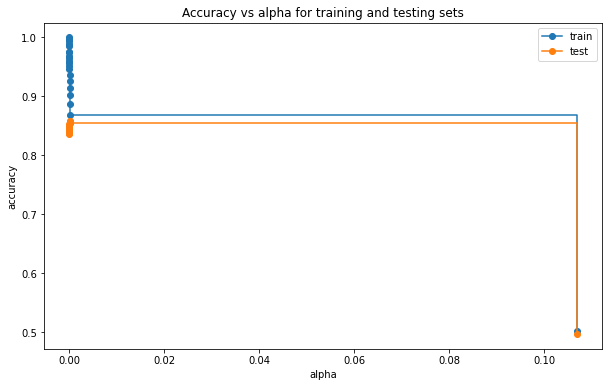

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(selected_alphas, train_scores, marker='o', label="train",
         drawstyle="steps-post")
plt.plot(selected_alphas, test_scores, marker='o', label="test",
         drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.legend()
plt.show()

In [17]:
# Print the optimal alpha value
optimal_idx = np.argmax(test_scores)
print(f"Optimal alpha value: {selected_alphas[optimal_idx]:.6f}")
print(f"Best test accuracy: {test_scores[optimal_idx]:.4f}")

Optimal alpha value: 0.000025
Best test accuracy: 0.8575


#### Drawback of the above approach
<p> I made a common mistake in my previous experiment by using the test dataset to find the best ccp_alpha value. The test set should remain completely untouched until final evaluation, as it represents new, unseen data.
The correct approach is to:

Split the training data into two parts - a new training set and a validation set (taking 25% for validation)
Use this validation set, not the test set, to find the optimal ccp_alpha value
Only after choosing the best ccp_alpha, evaluate the model's performance on the untouched test set

Let's rerun the experiment following this proper validation strategy to compare the tree's accuracy before and after pruning. </p>

## 2)  Three-way Split Results (with validation set):
<p>
In my approach, I split my data to create a validation set for finding the optimal alpha value, keeping the test set completely untouched. I used this validation set to tune the model, then evaluated the final performance on the test set and added detailed metrics. This method proved more effective because I avoided overfitting to my test data and got a more realistic picture of how well my model will perform on new data.
</p>

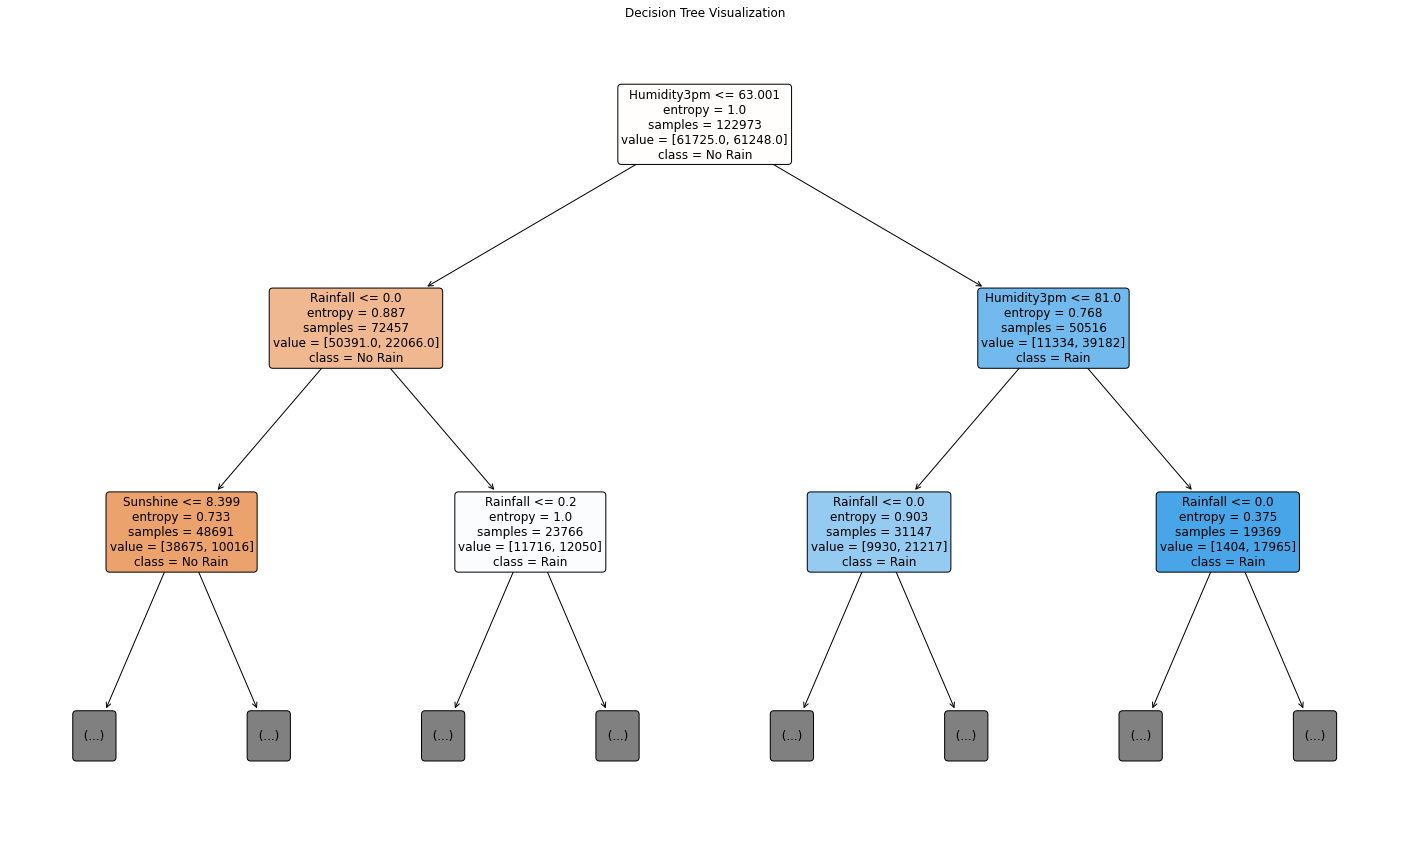

Initial Accuracy Scores:
Training: 0.9998292308067624
Validation: 0.8329186182669789
Testing: 0.834196322385875


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

balanced_dataset = pd.read_csv('weather_final.csv')
X = balanced_dataset.drop('RainTomorrow', axis=1)
y = balanced_dataset['RainTomorrow']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=47)

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(25,15))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Rain', 'Rain'],  
          filled=True,  
          rounded=True,
          max_depth=2) 
plt.title('Decision Tree Visualization')
plt.show()

print('Initial Accuracy Scores:')
print('Training:', accuracy_score(y_train, dt_model.predict(X_train)))
print('Validation:', accuracy_score(y_val, dt_model.predict(X_val)))
print('Testing:', accuracy_score(y_test, dt_model.predict(X_test)))


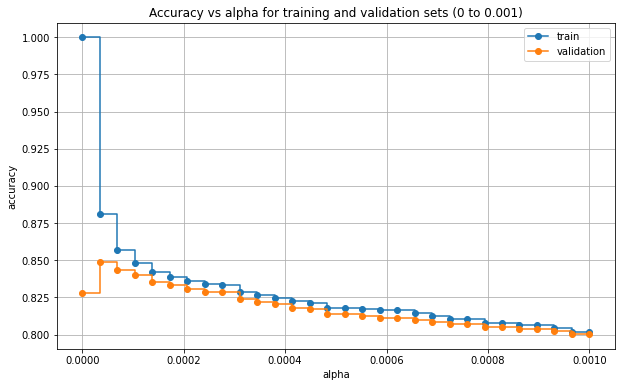

In [19]:
# Create granular alpha values
selected_alphas = np.linspace(0, 0.001, 30)
train_scores = np.zeros(len(selected_alphas))
val_scores = np.zeros(len(selected_alphas))

for i, alpha in enumerate(selected_alphas):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores[i] = clf.score(X_train, y_train)
    val_scores[i] = clf.score(X_val, y_val)

plt.figure(figsize=(10, 6))
plt.plot(selected_alphas, train_scores, marker='o', label="train",
         drawstyle="steps-post")
plt.plot(selected_alphas, val_scores, marker='o', label="validation",
         drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and validation sets (0 to 0.001)")
plt.legend()
plt.grid(True)
plt.show()


Optimal alpha analysis:
Recommended alpha value: 0.000966
Training accuracy: 0.8020
Validation accuracy: 0.8004
Gap: 0.0016


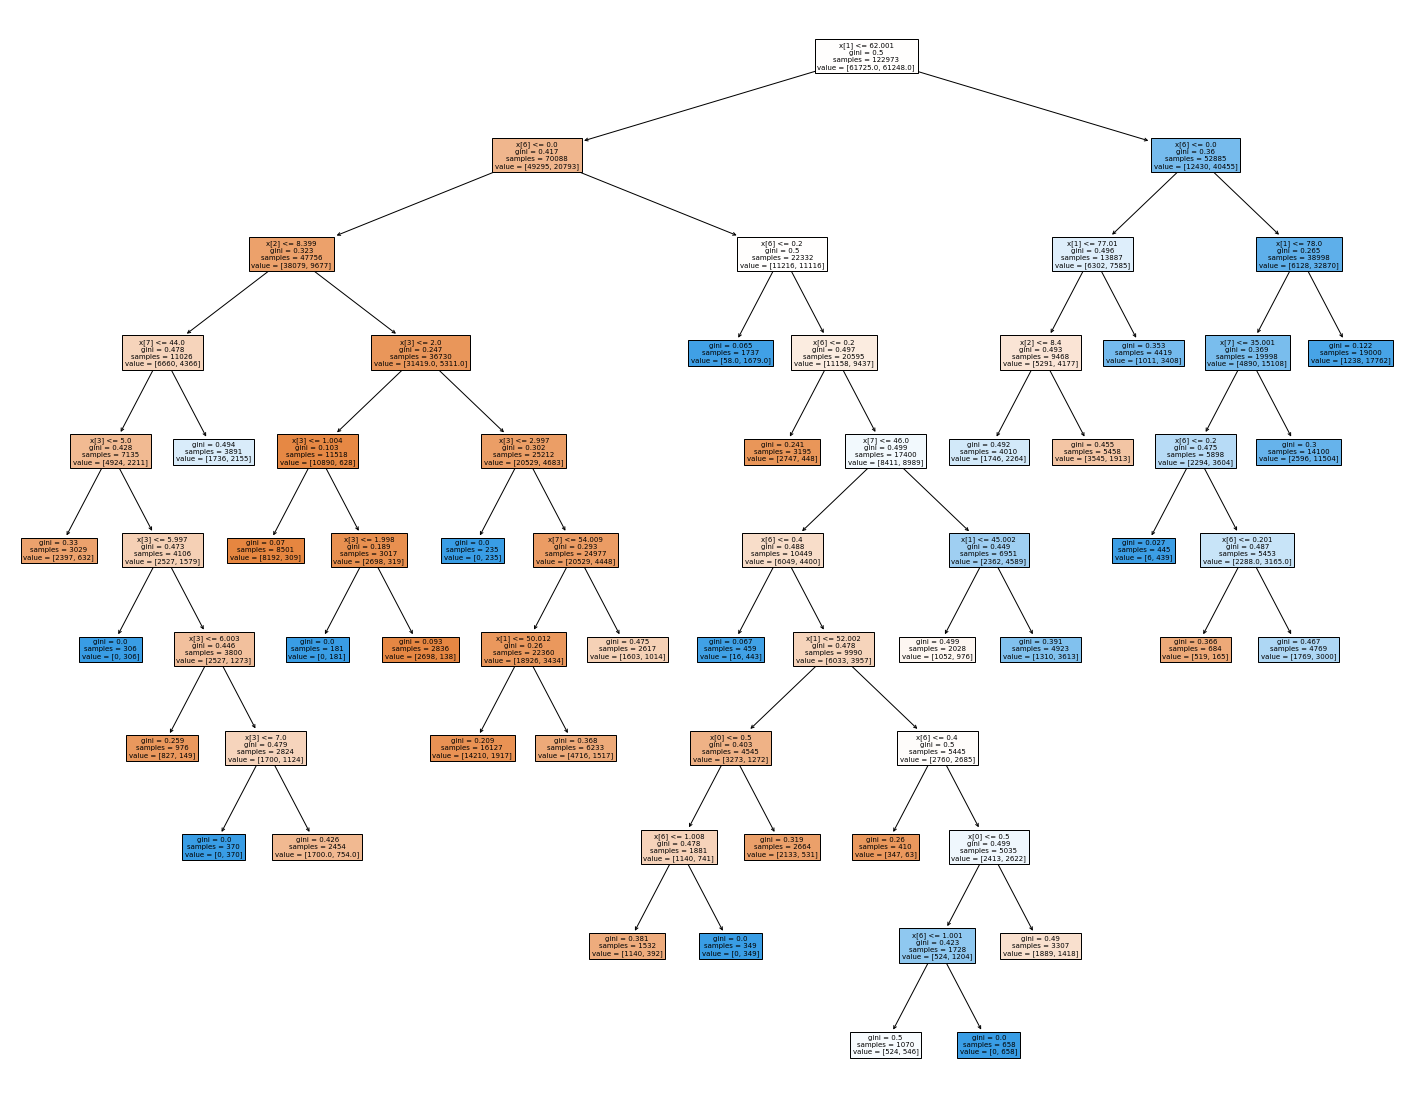

In [20]:
# Find best alpha using validation set
gaps = train_scores - val_scores
acceptable_val = val_scores >= 0.76  
if np.any(acceptable_val):
    eligible_indices = np.where(acceptable_val)[0]
    best_idx = eligible_indices[np.argmin(gaps[eligible_indices])]
    optimal_alpha = selected_alphas[best_idx]
    
    print("\nOptimal alpha analysis:")
    print(f"Recommended alpha value: {optimal_alpha:.6f}")
    print(f"Training accuracy: {train_scores[best_idx]:.4f}")
    print(f"Validation accuracy: {val_scores[best_idx]:.4f}")
    print(f"Gap: {gaps[best_idx]:.4f}")
    
    final_model = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_alpha)
    final_model.fit(X_train, y_train)

    plt.figure(figsize=(25,20))
    plot_tree(final_model, filled=True)
    plt.show()
    

#### Evaluate on all sets


 Model Performance:
Training accuracy: 0.8020215819732787
Validation accuracy: 0.8004488680718189
Test accuracy: 0.8009514225596926


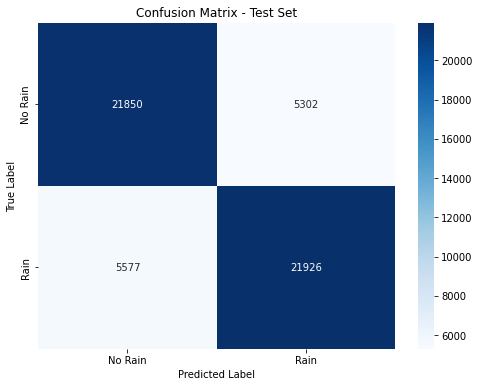


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     27152
           1       0.81      0.80      0.80     27503

    accuracy                           0.80     54655
   macro avg       0.80      0.80      0.80     54655
weighted avg       0.80      0.80      0.80     54655



In [21]:

print("\n Model Performance:")
print("Training accuracy:", accuracy_score(y_train, final_model.predict(X_train)))
print("Validation accuracy:", accuracy_score(y_val, final_model.predict(X_val)))
print("Test accuracy:", accuracy_score(y_test, final_model.predict(X_test)))

# Create confusion matrix for test set
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, final_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report on Test Set:")
print(classification_report(y_test, final_model.predict(X_test)))

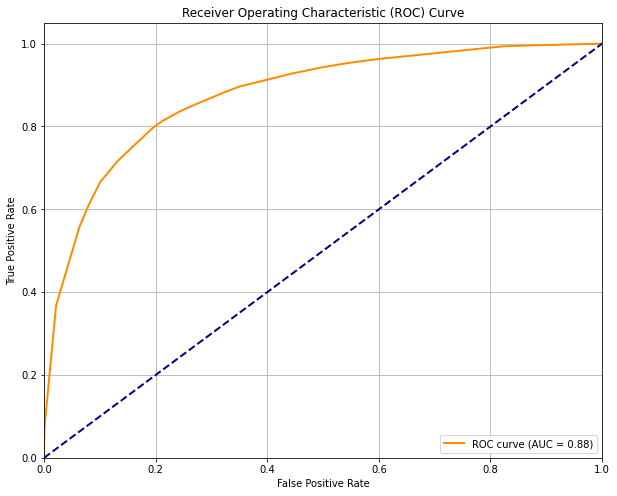

AUC Score: 0.876


In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_pred_proba = final_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

# Create ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f'AUC Score: {roc_auc:.3f}')



## Result Collection

This is a solid performing model with several positive characteristics:

Balanced and consistent performance across both classes
No signs of overfitting
Good generalization to unseen data
Reliable predictions with 80% accuracy, which is quite good depending on the domain context